In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes\r\n6,148,72,35,0,33.6,0.627,50,pos\r\n1,85,66,29,0,26.6,0.351,31,neg\r\n8,183,64,0,0,23.3,0.672,32,pos\r\n1,89,66,23,94,28.1,0.167,21,neg\r\n0,137,40,35,168,43.1,2.288,33,pos\r\n5,116,74,0,0,25.6,0.201,30,neg\r\n3,78,50,32,88,31,0.248,26,pos\r\n10,115,0,0,0,35.3,0.134,29,neg\r\n2,197,70,45,543,30.5,0.158,53,pos\r\n8,125,96,0,0,0,0.232,54,pos\r\n4,110,92,0,0,37.6,0.191,30,neg\r\n10,168,74,0,0,38,0.537,34,pos\r\n10,139,80,0,0,27.1,1.441,57,neg\r\n1,189,60,23,846,30.1,0.398,59,pos\r\n5,166,72,19,175,25.8,0.587,51,pos\r\n7,100,0,0,0,30,0.484,32,pos\r\n0,118,84,47,230,45.8,0.551,31,pos\r\n7,107,74,0,0,29.6,0.254,31,pos\r\n1,103,30,38,83,43.3,0.183,33,neg\r\n1,115,70,30,96,34.6,0.529,32,pos\r\n3,126,88,41,235,39.3,0.704,27,neg\r\n8,99,84,0,0,35.4,0.388,50,neg\r\n7,196,90,0,0,39.8,0.451,41,pos\r\n9,119,80,35,0,29,0.263,29,pos\r\n11,143,94,33,146,36.6,0.254,51,pos\r\n10,125,70,26,115,31.1,0.205,41,pos\r\n7,

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [ ]:
df.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
df['diabetes'].value_counts()

neg    500
pos    268
Name: diabetes, dtype: int64

In [ ]:
# baseline accuracy
268/768

0.3489583333333333

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


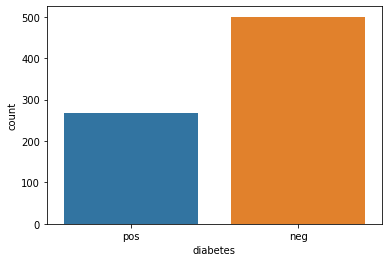

In [ ]:
sns.countplot(df['diabetes'])

In [ ]:
# logistic regression gives 0,1
#gives log of odds
# odds ratio
#p(head)=0.5
# odds(head)=0.5/0.5=1:1
# p(heads)= 7/10= 0.7
#odds(heads)= 0.7/0.3=2.33
# here we uae log of odds by fitting the data into a logit function

In [ ]:
x= df.iloc[:,:8]

In [ ]:
y=df['diabetes'].map({'neg':0,'pos':1})

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
model_lg= lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: diabetes, Length: 576, dtype: int64

In [ ]:
#check accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model_lg.predict(x_test) )

array([[115,  15],
       [ 25,  37]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score= accuracy_score(y_test,model_lg.predict(x_test))
accuracy_score

0.7916666666666666

In [ ]:
# precision= 37/37+15

In [ ]:
# recall= tp/tp+fp


In [ ]:
37/(37+25)

0.5967741935483871

In [ ]:
# baseline accuracy maintains ratio of 0 and 1 in records

In [ ]:
# performance of a model= ROC curve

In [ ]:
model_lg.predict_proba(x_test)[:5]

array([[0.02567799, 0.97432201],
       [0.8397328 , 0.1602672 ],
       [0.92320823, 0.07679177],
       [0.31943085, 0.68056915],
       [0.87793213, 0.12206787]])

In [ ]:
model_lg.predict(x_test)[:5]

array([1, 0, 0, 1, 0])

In [ ]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(y_test,model_lg.predict(x_test))
auc= metrics.roc_auc_score(y_test,model_lg.predict(x_test))

In [ ]:
# value is stored in _

In [ ]:
auc

0.7406947890818858

In [ ]:
import matplotlib.pyplot as plt


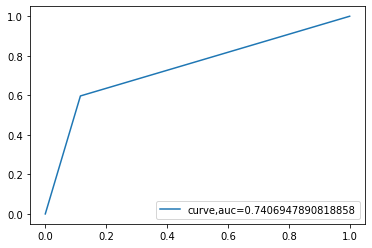

In [ ]:
plt.plot(fpr,tpr,label= "curve,auc="+ str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# p values
# ODDS ratio
# statsmodel

In [ ]:
import statsmodels.api as sm
m= sm.Logit(y_train,x_train)
m1= m.fit()
m1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.622286
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Sat, 22 May 2021   Pseudo R-squ.:                 0.04564
Time:                        04:15:45   Log-Likelihood:                -358.44
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 1.523e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pregnant       0.0958      0.032      3.016      0.003       0.034       0.158
glucose        0.0115      0.003      3.659      0.000       0.005       0.018
pressure      -0.0304      0.005     -5.586      0.000      -0.041      -0.020
triceps        0.0049      0.007      0.707      0.479      -0.009       0.019
insulin        0.0005      0.001      0.557      0.578      -0.001       0.002
mass          -0.0024      0.012     -0.190      0.849      -0.027       0.022
pedigree       0.2941      0.275      1.071      0.284      -0.244       0.832
age           -0.0089      0.009     -0.939      0.348      -0.027       0.010
==============================================================================
"""

In [ ]:
# more p value are not making impact

In [ ]:
m1.params

pregnant    0.095800
glucose     0.011496
pressure   -0.030365
triceps     0.004916
insulin     0.000492
mass       -0.002352
pedigree    0.294089
age        -0.008904
dtype: float64

In [ ]:
df1= pd.get_dummies(df)

In [ ]:
df1

,a_x,a_y,a_z
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1


In [ ]:
df1.fillna(3)

,a_x,a_y,a_z
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# max leadf nodes should more then 5

In [ ]:
import matplotlib

In [ ]:
pip install dtreeplt

     |████████████████████████████████| 788kB 5.3MB/s 
     |████████████████████████████████| 368kB 10.6MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.23.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [ ]:
dt= DecisionTreeClassifier(max_leaf_nodes=10)
model_tree= dt.fit(x_train,y_train)
from dtreeplt import dtreeplt
n= np.array(['pos','neg'])

In [ ]:
dtree= dtreeplt(model= model_tree, feature_names=x.columns, target_names=n)


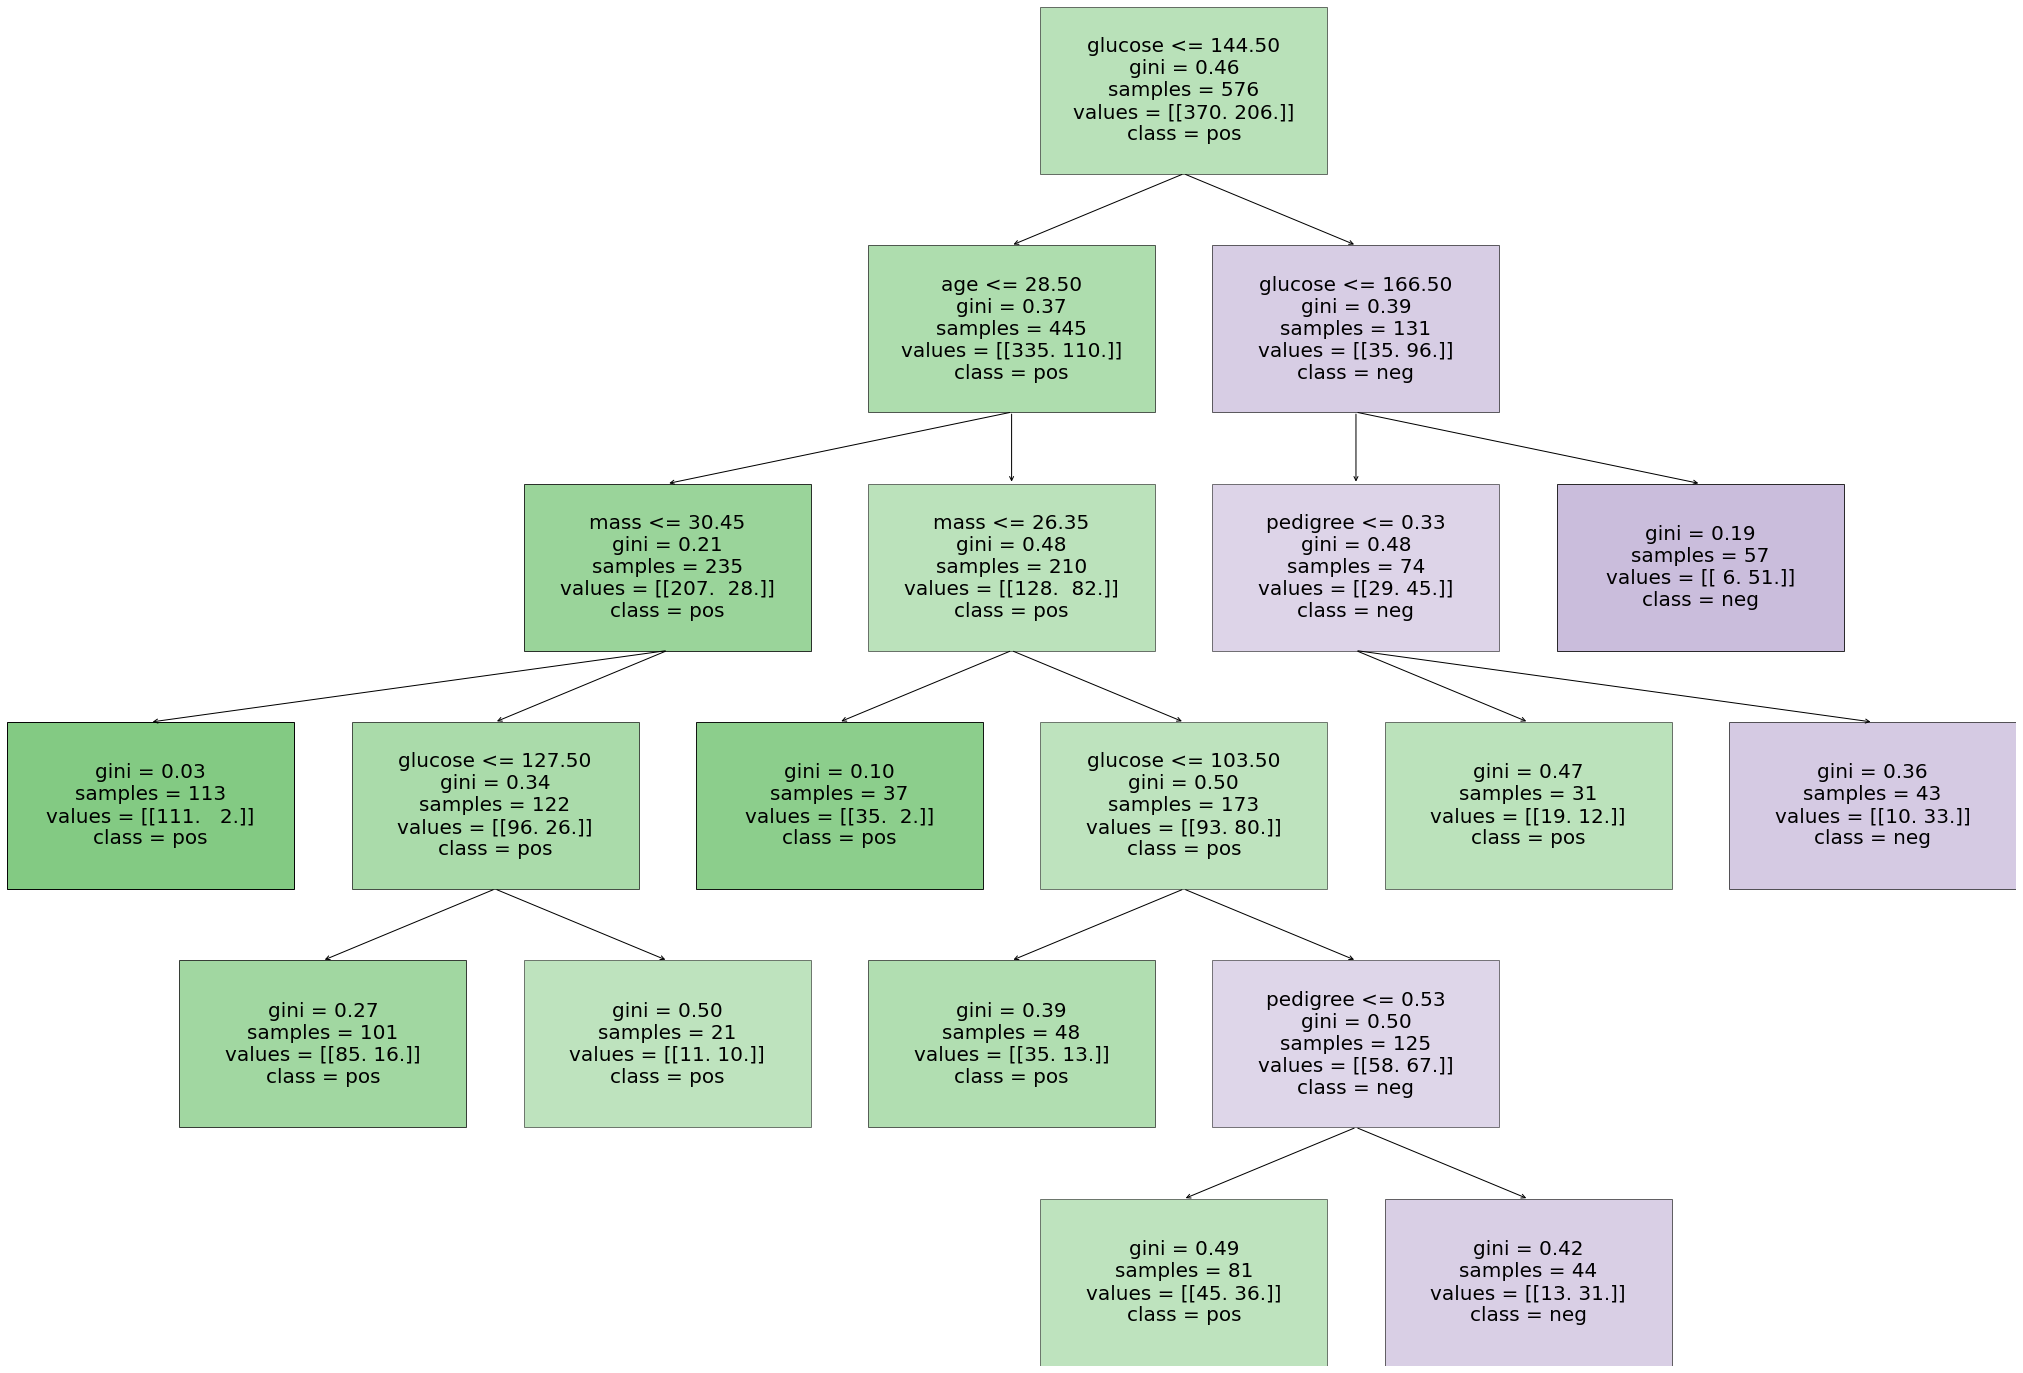

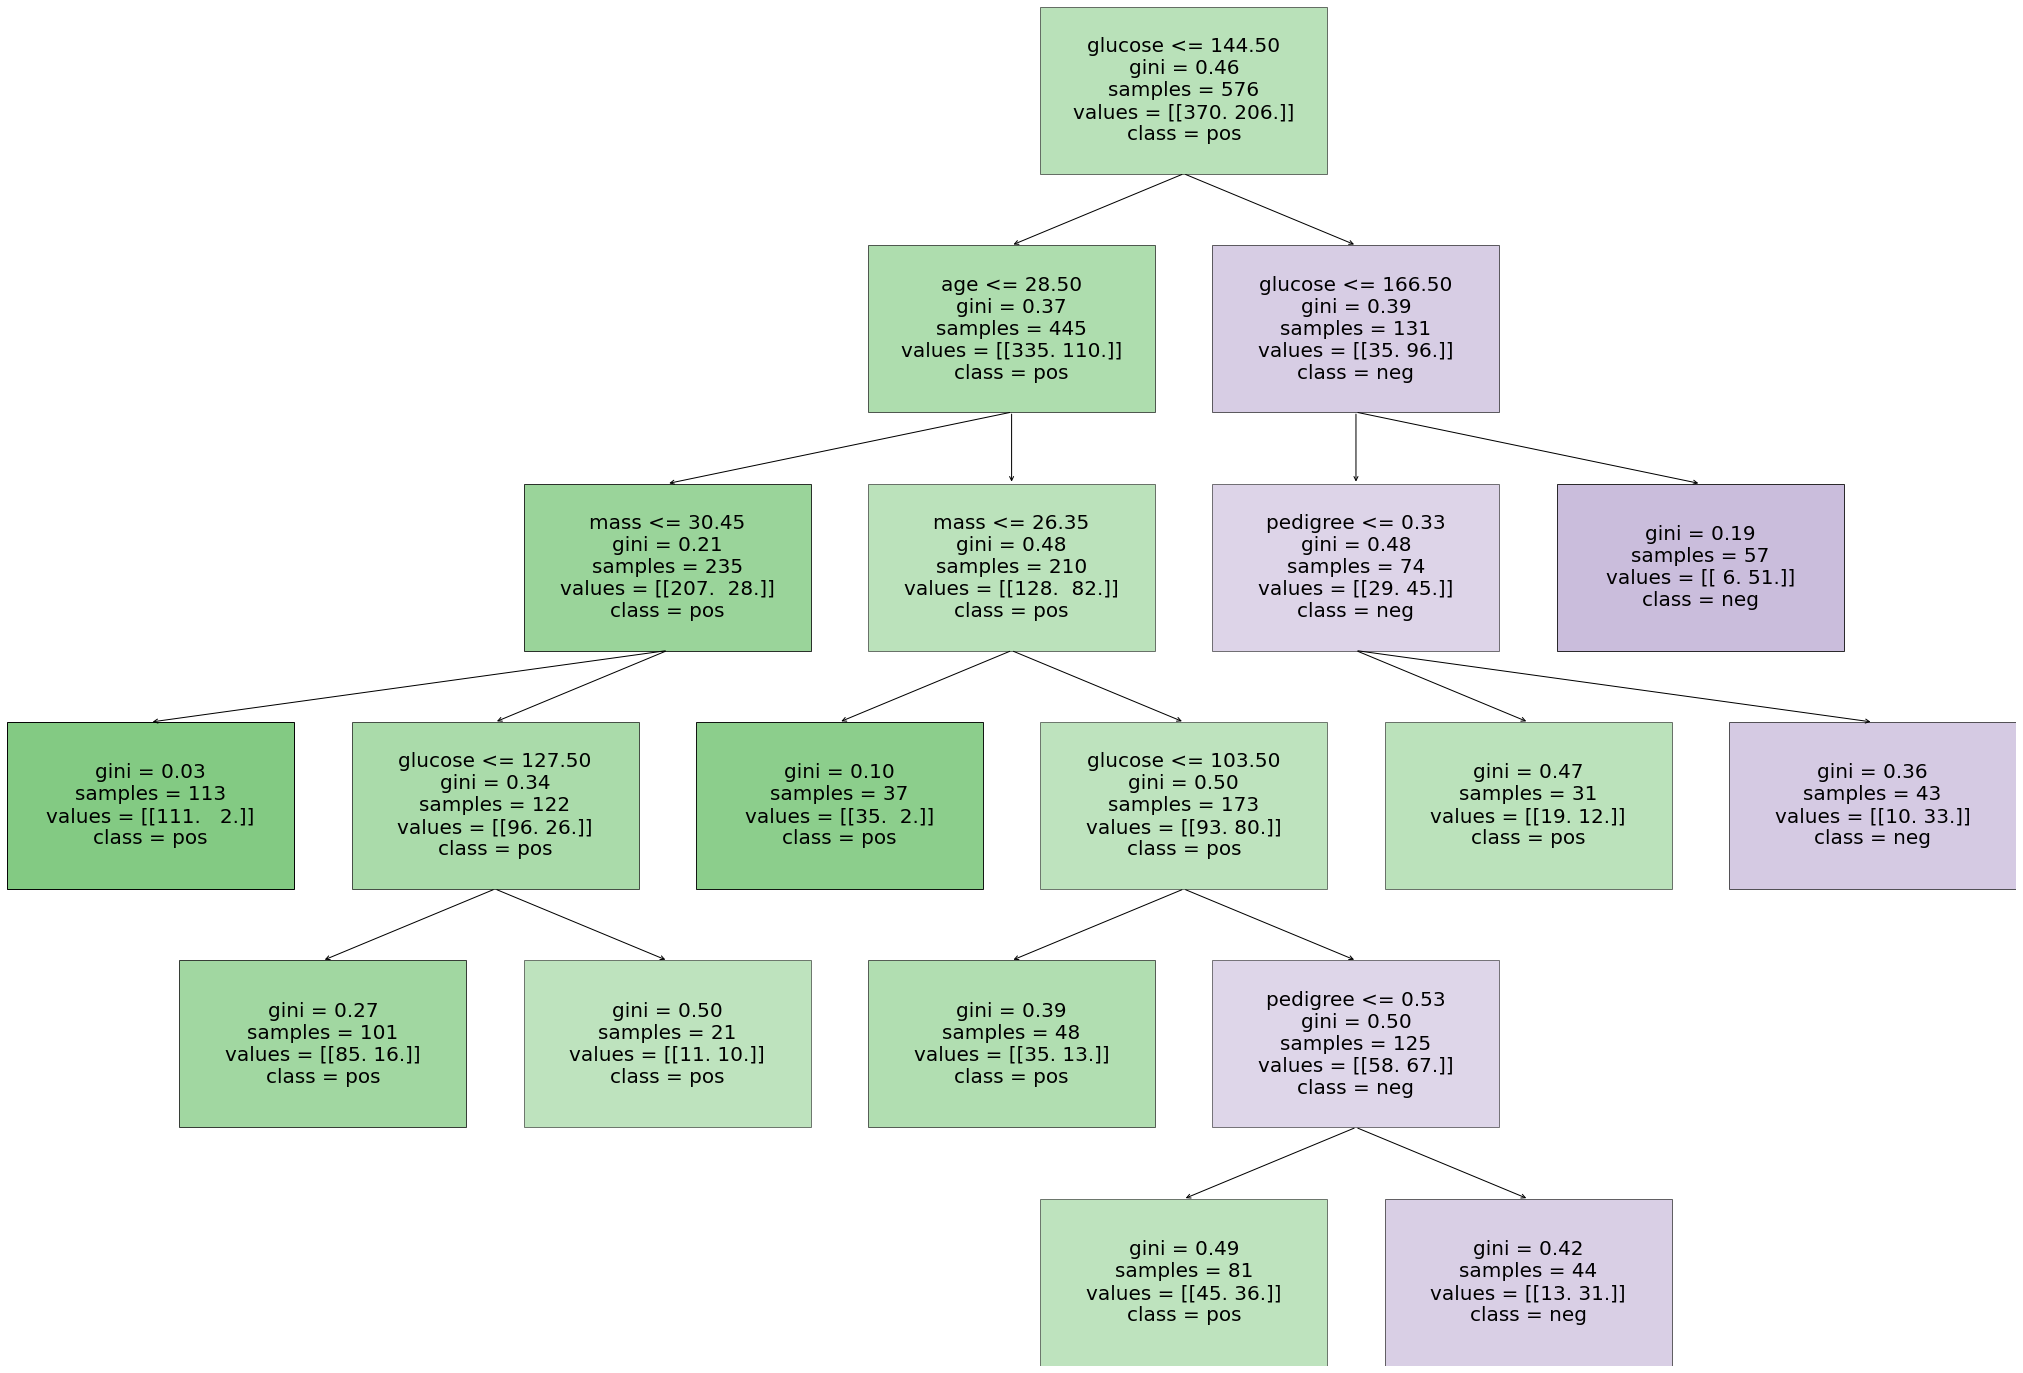

In [ ]:
dtree.view()

In [ ]:
res_tree= model_tree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,res_tree )

array([[117,  13],
       [ 32,  30]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score= accuracy_score(y_test,res_tree)
accuracy_score

0.765625

In [ ]:
30/43

0.6976744186046512

In [ ]:
# logistic regression is better then this

In [ ]:
# svm 

In [ ]:
# svm kernel projects a data to a highier dimension for easy separation

In [ ]:
from sklearn.svm import SVC

In [ ]:
s= SVC()

In [ ]:
model_svm= s.fit(x_train,y_train)
res_svm= model_svm.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score= accuracy_score(y_test,res_svm)
accuracy_score

0.7708333333333334

In [ ]:
res_svm

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,res_svm )

array([[119,  11],
       [ 33,  29]])

Ensemble technique

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_model= rf.fit(x_train,y_train)
res_rf= rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,res_rf)

array([[115,  15],
       [ 30,  32]])